In [449]:
import pandas as pd
import numpy as np
import pickle
import re
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from operator import itemgetter, attrgetter, methodcaller

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split 
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [155]:
import scipy.stats as stats
def diagnostic_plot(y, pred):
    plt.figure(figsize=(20,8))
    res = y - pred
    
    plt.subplot(1, 3, 1)
    plt.scatter(y, res)
    plt.plot(np.linspace(y.min()-np.std(y), y.max()+np.std(y), 1000), np.linspace(0,0,1000), 'grey', linestyle='--')
    plt.title("Residual plot of Y-Actual", size=15)
    plt.xlabel("Y Actual", size=15)
    plt.ylabel("Residuals", size=15)

    plt.subplot(1, 3, 2)
    plt.scatter(pred, res)
    plt.plot(np.linspace(pred.min()-np.std(pred), pred.max()+np.std(pred), 1000), np.linspace(0,0,1000), 'grey', linestyle='--')
    plt.title("Residual plot of Y-Predict", size=15)
    plt.xlabel("Prediction", size=15)
    plt.ylabel("Residuals", size=15)

    plt.subplot(1, 3, 3)
    stats.probplot(res, dist="norm", plot=plt)
    plt.xlabel("Theoretical Quantiles", size=15)
    plt.ylabel("Ordered Values", size=15)
    plt.title("Normal Q-Q plot", size=15)

In [4]:
# compute with R^2 formulas from the theory
def calc_Rsq(y, pred):
    SS_Residual = sum((y-pred)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    mean_root_error = np.sqrt(np.mean((y - pred)**2))
    return ({'r_squared: ': r_squared, 
             'adjusted_r_squared: ': adjusted_r_squared, 
             'mean_root_error: ': mean_root_error})

In [5]:
with open("coffee_master_cleaned2.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)

In [110]:
df.columns

Index(['Total_Score', 'Altitude', 'Harvest_year', 'Acidity', 'Sweetness',
       'Moisture', 'Defects_cat1', 'Quakers', 'Defects_cat2', 'Grading_year',
       'total_weight', 'Quakers_gr', 'Country_Brazil', 'Country_Burundi',
       'Country_China', 'Country_Colombia', 'Country_Costa_Rica',
       'Country_Cote_d?Ivoire', 'Country_Ecuador', 'Country_El_Salvador',
       'Country_Ethiopia', 'Country_Guatemala', 'Country_Haiti',
       'Country_Honduras', 'Country_India', 'Country_Indonesia',
       'Country_Japan', 'Country_Kenya', 'Country_Laos', 'Country_Malawi',
       'Country_Mauritius', 'Country_Mexico', 'Country_Myanmar',
       'Country_Nicaragua', 'Country_Panama', 'Country_Papua_New_Guinea',
       'Country_Peru', 'Country_Philippines', 'Country_Rwanda',
       'Country_Taiwan', 'Country_Tanzania,_United_Republic_Of',
       'Country_Thailand', 'Country_Uganda', 'Country_United_States',
       'Country_United_States_Hawaii', 'Country_United_States_Puerto_Rico',
       'Country

In [6]:
df.columns=[x.replace('-', '_').replace('/ ', '').replace(' ', '_').replace('(', '').replace(')', '') for x in df.columns]
df.columns

Index(['Total_Score', 'Altitude', 'Harvest_year', 'Acidity', 'Sweetness',
       'Moisture', 'Defects_cat1', 'Quakers', 'Defects_cat2', 'Grading_year',
       'total_weight', 'Quakers_gr', 'Country_Brazil', 'Country_Burundi',
       'Country_China', 'Country_Colombia', 'Country_Costa_Rica',
       'Country_Cote_d?Ivoire', 'Country_Ecuador', 'Country_El_Salvador',
       'Country_Ethiopia', 'Country_Guatemala', 'Country_Haiti',
       'Country_Honduras', 'Country_India', 'Country_Indonesia',
       'Country_Japan', 'Country_Kenya', 'Country_Laos', 'Country_Malawi',
       'Country_Mauritius', 'Country_Mexico', 'Country_Myanmar',
       'Country_Nicaragua', 'Country_Panama', 'Country_Papua_New_Guinea',
       'Country_Peru', 'Country_Philippines', 'Country_Rwanda',
       'Country_Taiwan', 'Country_Tanzania,_United_Republic_Of',
       'Country_Thailand', 'Country_Uganda', 'Country_United_States',
       'Country_United_States_Hawaii', 'Country_United_States_Puerto_Rico',
       'Country

In [301]:
# Dummies removed: Total_Score, 'Harvest_year', Color_None, Variety_gr_nan,'Country_United_States', 'Processing_meth_Other'
features=['Altitude',  'Acidity', 'Sweetness',
       'Moisture', 'Defects_cat1', 'Quakers', 'Defects_cat2', 'Grading_year',
       'total_weight', 'Quakers_gr', 'Country_Brazil', 'Country_Burundi',
       'Country_China', 'Country_Colombia', 'Country_Costa_Rica',
       'Country_Cote_d?Ivoire', 'Country_Ecuador', 'Country_El_Salvador',
       'Country_Ethiopia', 'Country_Guatemala', 'Country_Haiti',
       'Country_Honduras', 'Country_India', 'Country_Indonesia',
       'Country_Japan', 'Country_Kenya', 'Country_Laos', 'Country_Malawi',
       'Country_Mauritius', 'Country_Mexico', 'Country_Myanmar',
       'Country_Nicaragua', 'Country_Panama', 'Country_Papua_New_Guinea',
       'Country_Peru', 'Country_Philippines', 'Country_Rwanda',
       'Country_Taiwan', 'Country_Tanzania,_United_Republic_Of',
       'Country_Thailand', 'Country_Uganda',
       'Country_United_States_Hawaii', 'Country_United_States_Puerto_Rico',
       'Country_Vietnam', 'Country_Zambia', 'Variety_gr_Bourbon',
       'Variety_gr_Catimor', 'Variety_gr_Catuai', 'Variety_gr_Caturra',
       'Variety_gr_Gesha', 'Variety_gr_Hawaiian_Kona', 'Variety_gr_Mundo_Novo',
       'Variety_gr_Other', 'Variety_gr_Pacas', 'Variety_gr_SL14',
       'Variety_gr_SL28', 'Variety_gr_Typica', 'Variety_gr_Yellow_Bourbon',
       'Processing_meth_Natural_Dry',
       'Processing_meth_Pulped_natural_honey',
       'Processing_meth_Semi_washed_Semi_pulped', 'Processing_meth_Washed_Wet',
       'Color_Blue_Green', 'Color_Bluish_Green', 'Color_Green']

df[['Total_Score']+features].head()

,Total_Score,Altitude,Acidity,Sweetness,Moisture,Defects_cat1,Quakers,Defects_cat2,Grading_year,total_weight,...,Variety_gr_SL28,Variety_gr_Typica,Variety_gr_Yellow_Bourbon,Processing_meth_Natural_Dry,Processing_meth_Pulped_natural_honey,Processing_meth_Semi_washed_Semi_pulped,Processing_meth_Washed_Wet,Color_Blue_Green,Color_Bluish_Green,Color_Green
0,79.67,1264.0,7.17,10.0,0.00,0,0,9,2012,253.0,...,0,0,0,0,0,0,1,0,0,0
1,80.17,1100.0,7.33,10.0,0.11,0,0,2,2015,550.0,...,0,0,0,0,0,0,1,0,0,0
2,81.67,1200.0,7.42,10.0,0.12,0,0,0,2015,1200.0,...,0,0,0,0,0,0,1,0,0,1
3,81.67,1200.0,7.42,10.0,0.11,0,0,2,2012,275.0,...,0,0,0,0,0,0,1,0,0,1
4,80.42,600.0,7.25,10.0,0.11,0,0,0,2013,300.0,...,0,1,0,0,0,0,1,0,0,1


(array([  11.,    7.,   10.,   30.,   40.,   61.,   92.,  138.,  195.,
         246.,  210.,  143.,   78.,   39.,   20.,   13.,    8.,    6.,
           1.,    2.]),
 array([ 75.58,  76.33,  77.08,  77.83,  78.58,  79.33,  80.08,  80.83,
         81.58,  82.33,  83.08,  83.83,  84.58,  85.33,  86.08,  86.83,
         87.58,  88.33,  89.08,  89.83,  90.58]),
 <a list of 20 Patch objects>)

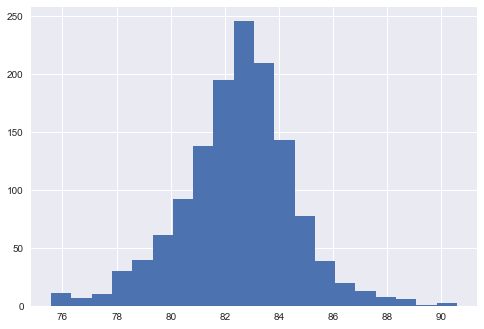

In [302]:
plt.hist(df['Total_Score'], bins=20)

In [303]:
corr=df[['Total_Score']+features].corr()
corr
# Total score is highly correlated to Acidity, sweetness, defect 2 (-), altitude
# Defect 1 and 2 are correlated, altitude & Acidity, acidity and defect 2, moisture and defect 2, grading year and quakers 
# Brazil, Colombia, Ethiopia, Variety_gr_Other, Variety_gr_Typica, Processing_meth_Washed / Wet

,Total_Score,Altitude,Acidity,Sweetness,Moisture,Defects_cat1,Quakers,Defects_cat2,Grading_year,total_weight,...,Variety_gr_SL28,Variety_gr_Typica,Variety_gr_Yellow_Bourbon,Processing_meth_Natural_Dry,Processing_meth_Pulped_natural_honey,Processing_meth_Semi_washed_Semi_pulped,Processing_meth_Washed_Wet,Color_Blue_Green,Color_Bluish_Green,Color_Green
Total_Score,1.000000,0.115174,0.751048,0.217662,-0.160747,-0.090999,-0.043967,-0.217251,0.008197,0.039445,...,0.079730,-0.204460,-0.000808,0.046914,0.025809,0.019264,-0.115210,0.076146,0.052184,-0.126776
Altitude,0.115174,1.000000,0.069058,0.120940,0.115619,-0.100701,-0.069602,-0.021294,0.111110,-0.048376,...,0.046358,0.014496,-0.028829,-0.170776,-0.027832,0.013547,0.292213,0.051353,-0.047741,0.135706
Acidity,0.751048,0.069058,1.000000,-0.025020,-0.119456,-0.047241,-0.043232,-0.131112,-0.020283,0.023243,...,0.091050,-0.173196,-0.043633,0.020277,0.002417,-0.006709,-0.052934,0.069837,0.041495,-0.092504
Sweetness,0.217662,0.120940,-0.025020,1.000000,0.058178,-0.054152,-0.068749,-0.104374,0.020986,0.018550,...,0.005895,0.029627,0.022561,-0.109646,0.021936,0.009420,0.079851,0.010192,-0.019938,0.051047
Moisture,-0.160747,0.115619,-0.119456,0.058178,1.000000,0.038014,-0.005242,0.135503,0.015054,0.017485,...,-0.011024,0.147107,-0.110463,-0.060445,0.021271,0.065112,0.176615,-0.010076,0.044573,0.196781
Defects_cat1,-0.090999,-0.100701,-0.047241,-0.054152,0.038014,1.000000,0.012805,0.325769,-0.060920,-0.020341,...,-0.019579,0.028200,-0.025315,0.099897,-0.020512,-0.030898,-0.060359,-0.006810,-0.037258,0.008458
Quakers,-0.043967,-0.069602,-0.043232,-0.068749,-0.005242,0.012805,1.000000,0.124977,0.308246,0.047713,...,-0.024208,-0.066512,-0.000172,0.036533,0.145178,-0.047510,-0.033188,-0.051495,-0.005770,0.092059
Defects_cat2,-0.217251,-0.021294,-0.131112,-0.104374,0.135503,0.325769,0.124977,1.000000,-0.055732,-0.016662,...,-0.041298,0.086314,-0.035212,0.063181,-0.027012,0.002842,0.026143,-0.056244,-0.088313,0.100459
Grading_year,0.008197,0.111110,-0.020283,0.020986,0.015054,-0.060920,0.308246,-0.055732,1.000000,0.072874,...,0.037163,-0.164249,0.022806,0.111521,0.142409,-0.105630,0.139358,0.045390,0.058047,0.262982
total_weight,0.039445,-0.048376,0.023243,0.018550,0.017485,-0.020341,0.047713,-0.016662,0.072874,1.000000,...,0.104930,-0.044002,-0.013462,0.036657,-0.009089,-0.020154,-0.006742,-0.021865,0.047874,-0.010998


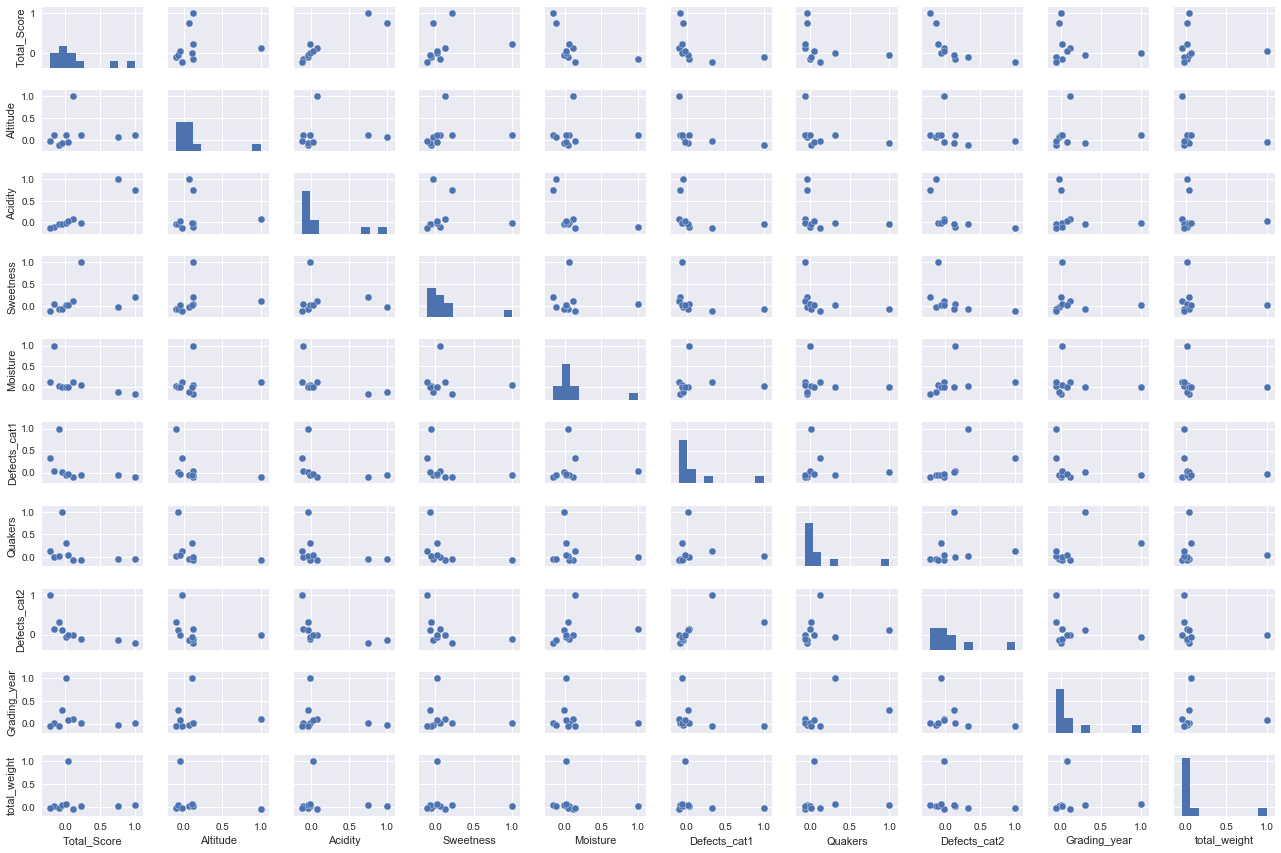

In [304]:
feat_quant=['Total_Score', 'Altitude', 'Harvest_year', 'Acidity', 'Sweetness',
       'Moisture', 'Defects_cat1', 'Quakers', 'Defects_cat2', 'Grading_year',
       'total_weight']
corr2=df[feat_quant].corr()
sns.pairplot(corr2, size = 1.2, aspect=1.5);

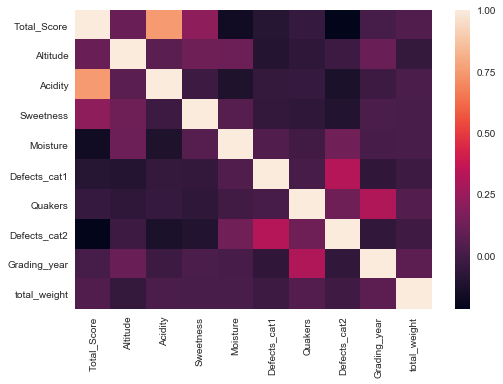

In [305]:
sns.heatmap(df[feat_quant].corr())

**Take care of the missings**

In [306]:
df[features].isnull().sum()[df[features].isnull().sum()>0]

Series([], dtype: int64)

In [307]:
df['Altitude'][df['Altitude'].isnull()]=0
df['Altitude'].isnull().sum()

0

In [308]:
df[features].isnull().sum()[df[features].isnull().sum()>0]

Series([], dtype: int64)

**Train-Test Split**

In [309]:
X = df[features]
y = df['Total_Score']

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

### Model 1 - Baseline using all columns untransformed to predict y_train
{'r_squared: ': 0.69106522817190585,   
'adjusted_r_squared: ': 0.67126171715728444,   
'mean_root_error: ': 1.1529903158215458}  
Model 1 CV Mean Squared Error:  1.52492964308

In [311]:
model1 = sm.OLS(y_train, sm.add_constant(X_train))
fit1 = model1.fit()
fit1.summary()
# Adj. R-squared on train: 0.672. 
# Sig: Acidity, Sweetness, Defect 2, Variety_gr_Typica, Country_United_States_Puerto_Rico, Country_India, constant, altitude

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Score   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     36.07
Date:                Tue, 17 Jul 2018   Prob (F-statistic):          5.41e-215
Time:                        19:20:12   Log-Likelihood:                -1686.2
No. Observations:                1080   AIC:                             3500.
Df Residuals:                    1016   BIC:                             3819.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      89.3342     48.334      1.848      0.065      -5.512     184.180
Altitude                                    0.0001   7.83e-05      1.755      0.080   -1.62e-05       0.000
Acidity                                     4.6836      0.137     34.147      0.000       4.414       4.953
Sweetness                                   1.6707      0.120     13.957      0.000       1.436       1.906
Moisture                                   -0.7281      0.920     -0.791      0.429      -2.534       1.077
Defects_cat1                               -0.0403      0.031     -1.314      0.189      -0.100       0.020
Quakers                                    -0.1142      0.091     -1.260      0.208      -0.292       0.064
Defects_cat2                               -0.0255      0.009     -2.969      0.003      -0.042      -0.009
Grading_year                               -0.0290      0.024     -1.207      0.228      -0.076       0.018
total_weight                            -3.571e-08   8.86e-08     -0.403      0.687    -2.1e-07    1.38e-07
Quakers_gr                                  0.2218      0.133      1.670      0.095      -0.039       0.482
Country_Brazil                             -0.1658      0.553     -0.300      0.764      -1.251       0.919
Country_Burundi                            -1.7261      1.316     -1.312      0.190      -4.309       0.856
Country_China                              -0.4018      0.687     -0.585      0.559      -1.750       0.946
Country_Colombia                           -0.0107      0.535     -0.020      0.984      -1.061       1.039
Country_Costa_Rica                         -0.0115      0.558     -0.021      0.984      -1.107       1.084
Country_Cote_d?Ivoire                      -1.1340      1.324     -0.857      0.392      -3.731       1.463
Country_Ecuador                            -0.5844      1.318     -0.443      0.658      -3.171       2.002
Country_El_Salvador                         0.3472      0.588      0.591      0.555      -0.807       1.501
Country_Ethiopia                            0.3192      0.548      0.582      0.561      -0.757       1.395
Country_Guatemala                          -0.8232      0.538     -1.529      0.126      -1.879       0.233
Country_Haiti                              -0.4743      0.802     -0.592      0.554      -2.047       1.099
Country_Honduras                           -0.4680      0.561     -0.834      0.405      -1.570       0.634
Country_India                               3.2712      1.409      2.321      0.020       0.506       6.037
Country_Indonesia                          -0.4557      0.613     -0.743      0.458      -1.659       0.748
Country_Japan                            3.156e-15   3.17e-

{'r_squared: ': 0.69106522817190585, 'adjusted_r_squared: ': 0.67126171715728444, 'mean_root_error: ': 1.1529903158215458}
Model 1 CV Mean Squared Error:  1.52492964308


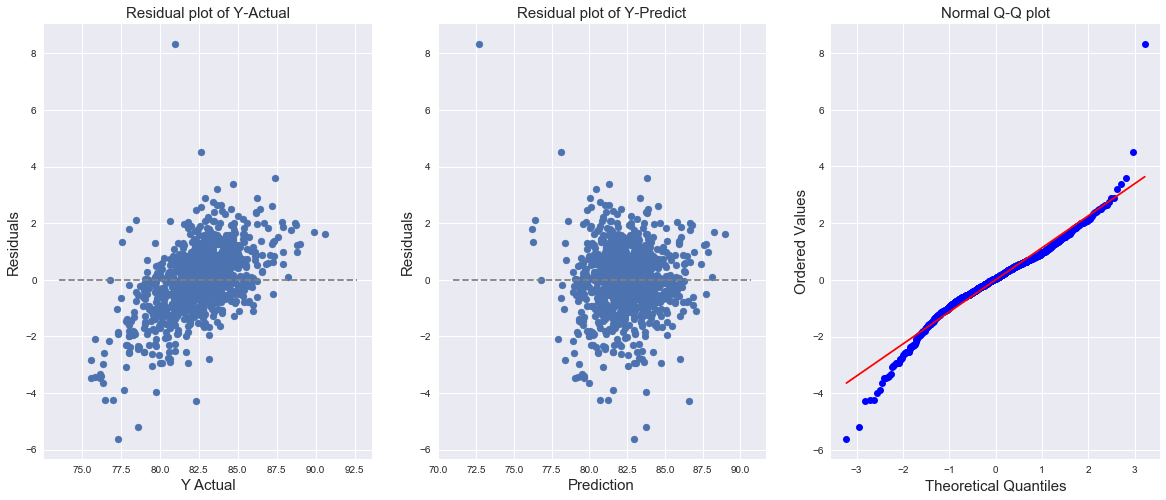

In [312]:
pred1 = fit1.predict(sm.add_constant(X_train))
print(calc_Rsq(y_train, pred1))

reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Model 1 CV Mean Squared Error: ", np.mean(-scores))

diagnostic_plot(y_train, pred1)

### Model 2
Transform some variables to logs because of skewedness, CV, no feature selection.   
{'r_squared: ': 0.68724963728712418,   
'adjusted_r_squared: ': 0.66720153711322183,   
'mean_root_error: ': 1.1600886406869575}  
Model 2 CV Mean Squared Error:  1.53306952377

(array([  1.02100000e+03,   3.30000000e+01,   8.00000000e+00,
          7.00000000e+00,   7.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

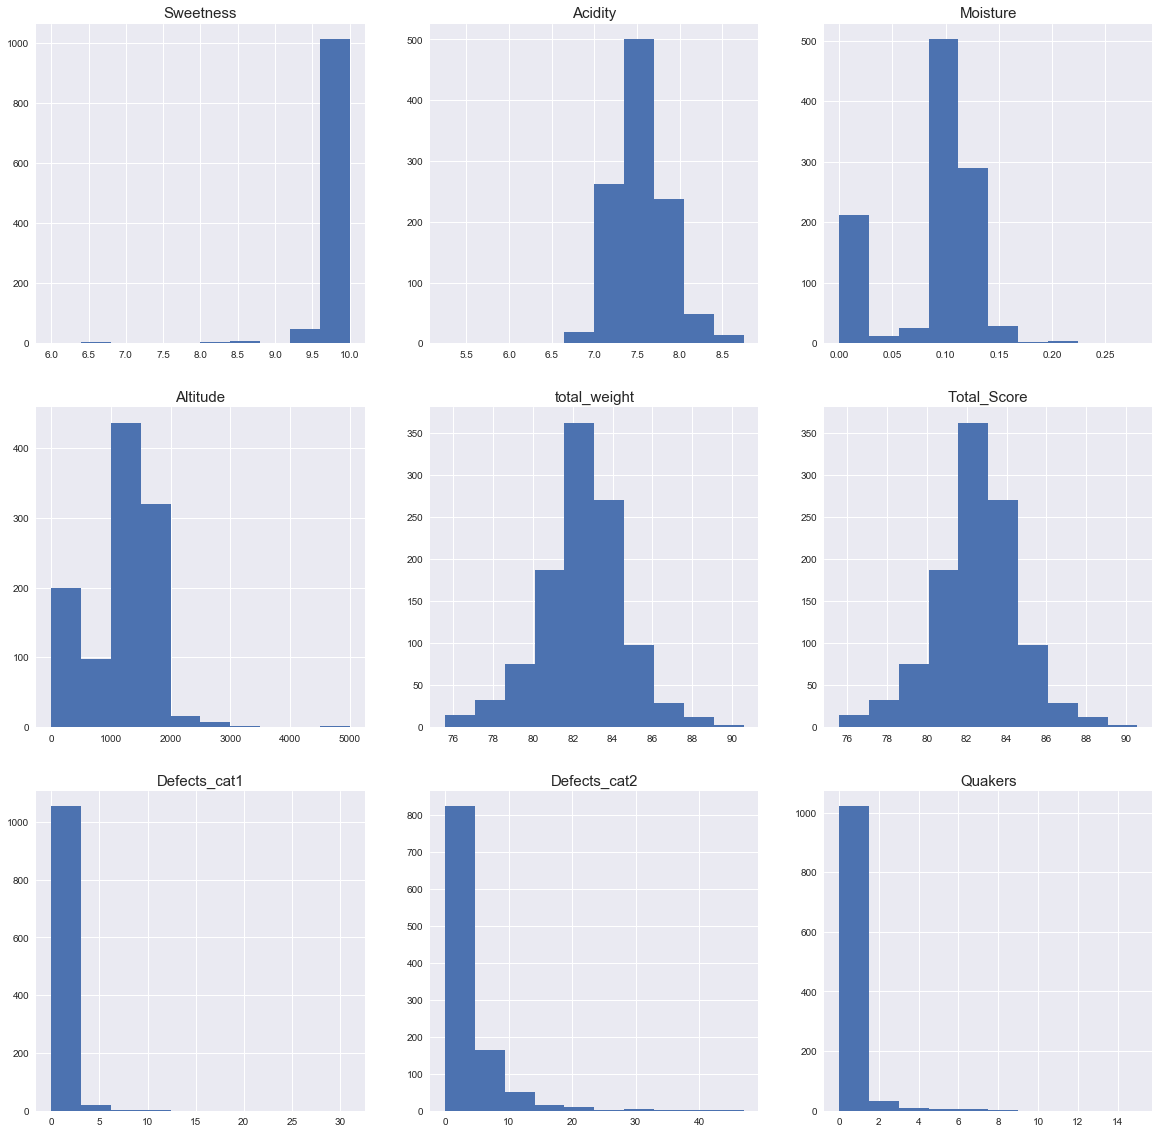

In [20]:
f, ax = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False, figsize=(20,20))

ax[0,0].set_title('Sweetness', size=15)
ax[0,0].hist(X_train['Sweetness'])
ax[0,1].set_title('Acidity', size=15)
ax[0,1].hist(X_train['Acidity'])
ax[0,2].set_title('Moisture', size=15)
ax[0,2].hist(X_train['Moisture'])

ax[1,0].set_title('Altitude', size=15)
ax[1,0].hist(X_train['Altitude'])
ax[1,1].set_title('total_weight', size=15)
ax[1,1].hist(y_train)
ax[1,2].set_title('Total_Score', size=15)
ax[1,2].hist(y_train)

ax[2,0].set_title('Defects_cat1', size=15)
ax[2,0].hist(X_train['Defects_cat1'])
ax[2,1].set_title('Defects_cat2', size=15)
ax[2,1].hist(X_train['Defects_cat2'])
ax[2,2].set_title('Quakers', size=15)
ax[2,2].hist(X_train['Quakers'])

Based on results above, I'm going to log the Sweetness, Altitude, Defects_cat1, Defects_cat2, Quakers.

In [313]:
def log_var(x):
    if x==0 or x=="nan": return 0
    else: return np.log(x)

In [314]:
X_train['Altitude_log'] = [log_var(x) for x in X_train['Altitude']]
X_train['Sweetness_log'] = [log_var(x) for x in X_train['Sweetness']]
X_train['Defects_cat1_log'] = [log_var(x) for x in X_train['Defects_cat1']]
X_train['Defects_cat2_log'] = [log_var(x) for x in X_train['Defects_cat2']]
X_train['Quakers_log'] = [log_var(x) for x in X_train['Quakers']]

(array([ 460.,  147.,  124.,   93.,   96.,   90.,   31.,   24.,    8.,    7.]),
 array([ 0.        ,  0.38501476,  0.77002952,  1.15504428,  1.54005904,
         1.9250738 ,  2.31008856,  2.69510332,  3.08011808,  3.46513284,
         3.8501476 ]),
 <a list of 10 Patch objects>)

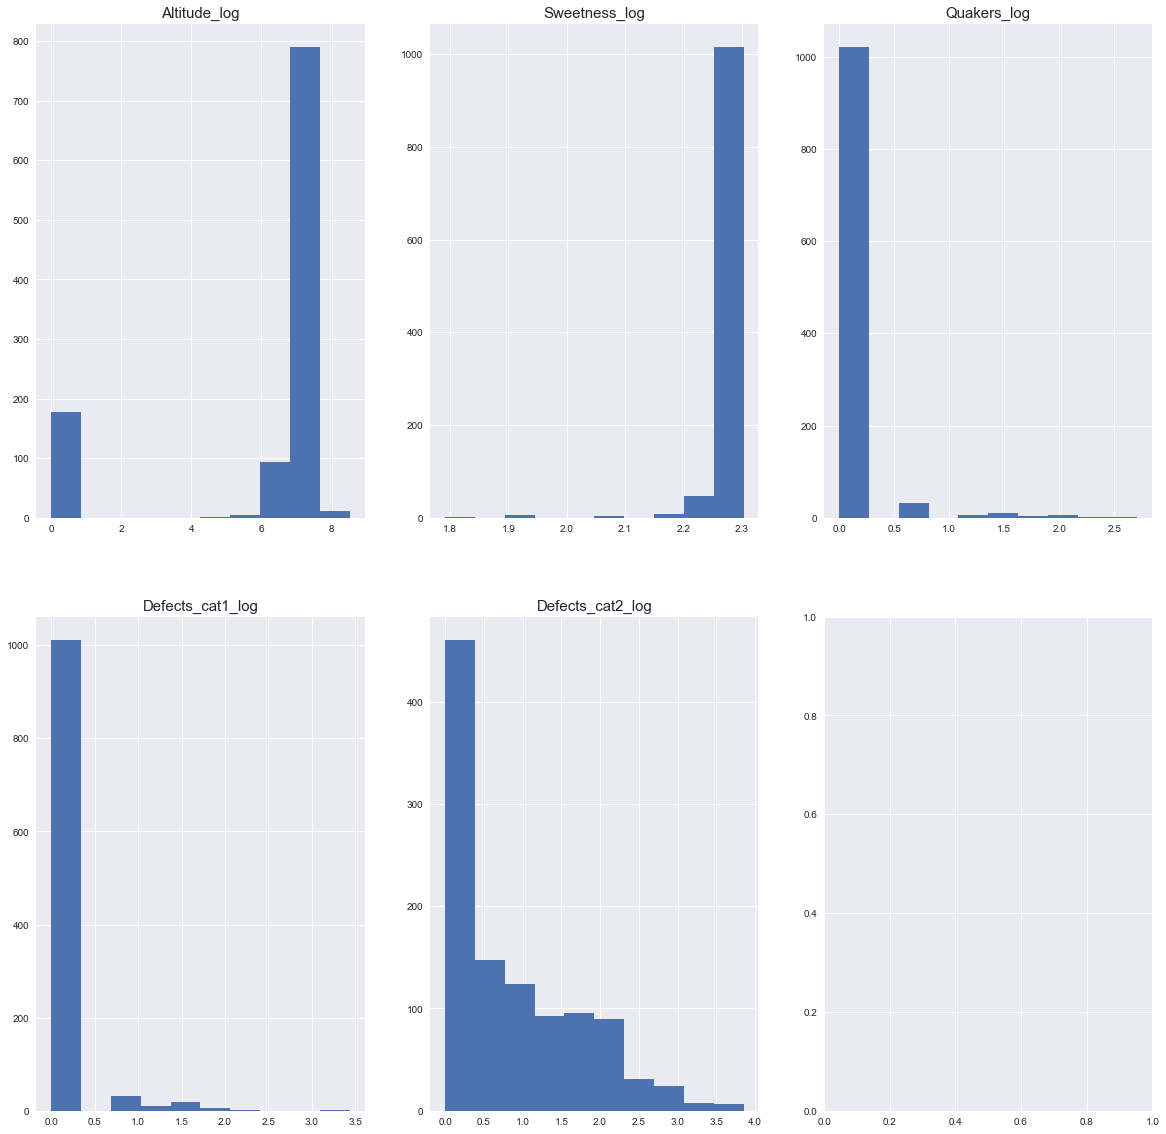

In [315]:
f, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, figsize=(20,20))

ax[0,0].set_title('Altitude_log', size=15)
ax[0,0].hist(X_train['Altitude_log'])
ax[0,1].set_title('Sweetness_log', size=15)
ax[0,1].hist(X_train['Sweetness_log'])
ax[0,2].set_title('Quakers_log', size=15)
ax[0,2].hist(X_train['Quakers_log'])

ax[1,0].set_title('Defects_cat1_log', size=15)
ax[1,0].hist(X_train['Defects_cat1_log'])
ax[1,1].set_title('Defects_cat2_log', size=15)
ax[1,1].hist(X_train['Defects_cat2_log'])


In [100]:
# Remove 'Altitude',  'Sweetness', 'Sweetness', 'Defects_cat1', 'Defects_cat2'
features2=[ 'Altitude_log', 'Sweetness_log', 'Quakers_log', 'Defects_cat1_log', 'Defects_cat2_log', 
    'Grading_year', 'Acidity', 'Moisture', 'total_weight',  
    'Color_Blue_Green', 'Color_Bluish_Green', 'Color_Green',
    'Processing_meth_Natural_Dry', 'Processing_meth_Pulped_natural_honey',
    'Processing_meth_Semi_washed_Semi_pulped', 'Processing_meth_Washed_Wet', 
    'Variety_gr_Bourbon', 'Variety_gr_Catimor', 'Variety_gr_Catuai', 'Variety_gr_Caturra',
    'Variety_gr_Gesha', 'Variety_gr_Hawaiian_Kona', 'Variety_gr_Mundo_Novo', 'Variety_gr_Other',
    'Variety_gr_Pacas', 'Variety_gr_SL14', 'Variety_gr_SL28', 'Variety_gr_Typica', 'Variety_gr_Yellow_Bourbon',    
    'Country_Brazil', 'Country_Burundi', 'Country_China', 'Country_Colombia', 'Country_Costa_Rica',
    'Country_Cote_d?Ivoire', 'Country_Ecuador', 'Country_El_Salvador', 'Country_Ethiopia', 'Country_Guatemala', 'Country_Haiti',
    'Country_Honduras', 'Country_India', 'Country_Indonesia', 'Country_Japan', 'Country_Kenya', 'Country_Laos', 'Country_Malawi',
    'Country_Mauritius', 'Country_Mexico', 'Country_Myanmar', 'Country_Nicaragua', 'Country_Panama', 'Country_Papua_New_Guinea',
    'Country_Peru', 'Country_Philippines', 'Country_Rwanda', 'Country_Taiwan', 'Country_Tanzania,_United_Republic_Of',
    'Country_Thailand', 'Country_Uganda', 'Country_United_States_Hawaii', 'Country_United_States_Puerto_Rico',
    'Country_Vietnam', 'Country_Zambia' 
    ]

In [101]:
model2 = sm.OLS(y_train, sm.add_constant(X_train[features2]))
fit2 = model2.fit()
fit2.summary()
# Adj. R-squared on train: 0.668. 
# Same: Acidity, Sweetness, Defect 2, Country_United_States_Puerto_Rico, Variety_gr_Typica, Country_India
# Added: Country_Japan, Country_Mauritius
# Removed: constant, altitude

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Score   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     36.05
Date:                Tue, 17 Jul 2018   Prob (F-statistic):          3.87e-213
Time:                        15:33:17   Log-Likelihood:                -1692.8
No. Observations:                1080   AIC:                             3512.
Df Residuals:                    1017   BIC:                             3826.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      55.6997     47.043      1.184      0.237     -36.613     148.012
Altitude_log                                0.0313      0.018      1.694      0.091      -0.005       0.068
Sweetness_log                              14.2117      1.029     13.809      0.000      12.192      16.231
Quakers_log                                 0.1470      0.148      0.993      0.321      -0.143       0.437
Defects_cat1_log                           -0.1432      0.129     -1.112      0.266      -0.396       0.109
Defects_cat2_log                           -0.1583      0.048     -3.267      0.001      -0.253      -0.063
Grading_year                               -0.0202      0.023     -0.866      0.387      -0.066       0.026
Acidity                                     4.6880      0.138     33.976      0.000       4.417       4.959
Moisture                                   -0.6498      0.927     -0.701      0.484      -2.470       1.170
total_weight                            -3.141e-08   8.85e-08     -0.355      0.723   -2.05e-07    1.42e-07
Color_Blue_Green                           -0.0609      0.195     -0.312      0.755      -0.444       0.322
Color_Bluish_Green                          0.0613      0.176      0.348      0.728      -0.285       0.407
Color_Green                                -0.1041      0.123     -0.847      0.397      -0.345       0.137
Processing_meth_Natural_Dry                 0.2403      0.186      1.291      0.197      -0.125       0.606
Processing_meth_Pulped_natural_honey       -0.0158      0.388     -0.041      0.968      -0.778       0.746
Processing_meth_Semi_washed_Semi_pulped     0.2510      0.251      0.999      0.318      -0.242       0.744
Processing_meth_Washed_Wet                 -0.1111      0.172     -0.646      0.519      -0.449       0.226
Variety_gr_Bourbon                         -0.2296      0.198     -1.158      0.247      -0.619       0.159
Variety_gr_Catimor                          0.4751      0.426      1.114      0.265      -0.362       1.312
Variety_gr_Catuai                          -0.2572      0.238     -1.082      0.279      -0.724       0.209
Variety_gr_Caturra                          0.1003      0.183      0.548      0.584      -0.259       0.460
Variety_gr_Gesha                            0.0066      0.555      0.012      0.990      -1.082       1.095
Variety_gr_Hawaiian_Kona                   -0.0940      0.374     -0.251      0.802      -0.829       0.641
Variety_gr_Mundo_Novo                      -0.4294      0.309     -1.389      0.165      -1.036       0.177
Variety_gr_Other                            0.0875      0.189      0.462      0.644      -0.284       0.459
Variety_gr_Pacas                           -0.4306      0.4

{'r_squared: ': 0.68724963728712418, 'adjusted_r_squared: ': 0.66720153711322183, 'mean_root_error: ': 1.1600886406869575}
Model 2 CV Mean Squared Error:  1.53306952377


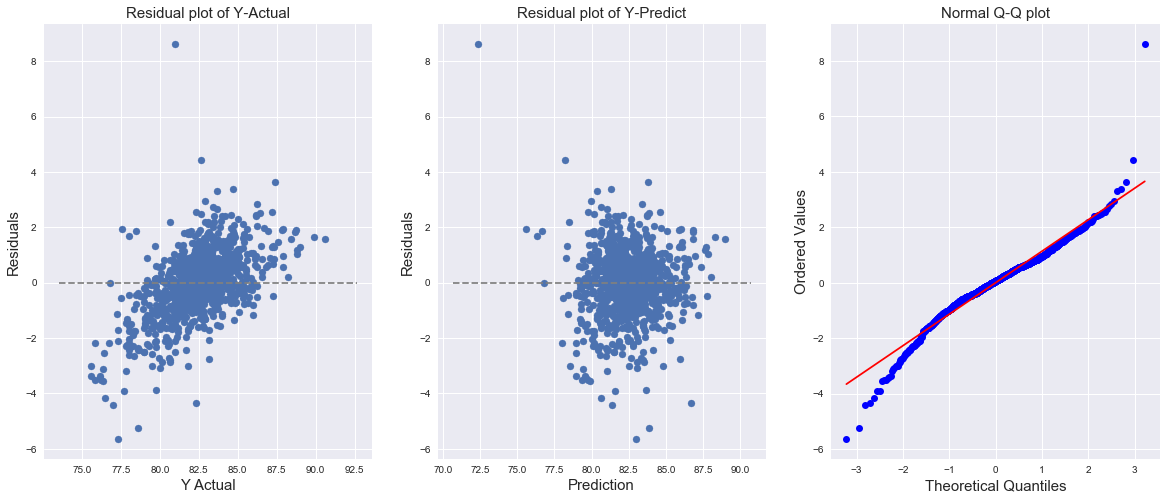

In [316]:
pred2 = fit2.predict(sm.add_constant(X_train[features2]))
print(calc_Rsq(y_train, pred2))

reg = LinearRegression()
scores = cross_val_score(reg, X_train[features2], y_train, cv=10, scoring='neg_mean_squared_error')
print("Model 2 CV Mean Squared Error: ", np.mean(-scores))

diagnostic_plot(y_train, pred2)

### Model 3: Use Grid Search Ridge Regularization to do Feature Selection on Logged Values
best_params:  {'alpha': 0.01}  
Final Selected Features: 46 Dropped: 18
{'r_squared: ': 0.68543322146445096,   
'adjusted_r_squared: ': 0.6652686843788389,   
'mean_root_error: ': 1.1634525898161512}  
Model 3 CV Mean Squared Error:  1.50967824981  

In [319]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso as Lasso
from sklearn.linear_model import LassoCV as LassoCV
from sklearn.preprocessing import StandardScaler

In [410]:
def Lasso_Feat_Select(X_train, y_train):
    ssX = StandardScaler()
    X_train_norm=ssX.fit_transform(X_train)

    reg = Lasso()
    grid = GridSearchCV(reg, cv=10, param_grid={'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10., 100]}, 
                        scoring='neg_mean_squared_error')
    grid.fit(X_train_norm, y_train)
    print("best_params: ", grid.best_params_)
    print("best_score: ", -grid.best_score_)
    coefs=list(zip(X_train.columns, grid.best_estimator_.coef_))
    selected=[x for x in coefs if abs(x[1])>=0.01]
    print("Final Selected Features:", len(selected), 
          "Dropped:", X_train[features2].shape[1]-len(selected))
    return grid, selected, ssX

In [411]:
model3, selected_features3, ssX3 =Lasso_Feat_Select(X_train=X_train[features2], y_train=y_train)

best_params:  {'alpha': 0.01}
best_score:  1.50967824981
Final Selected Features: 46 Dropped: 18


{'r_squared: ': 0.68543322146445096, 'adjusted_r_squared: ': 0.6652686843788389, 'mean_root_error: ': 1.1634525898161512}
Model 3 CV Mean Squared Error:  1.50967824981


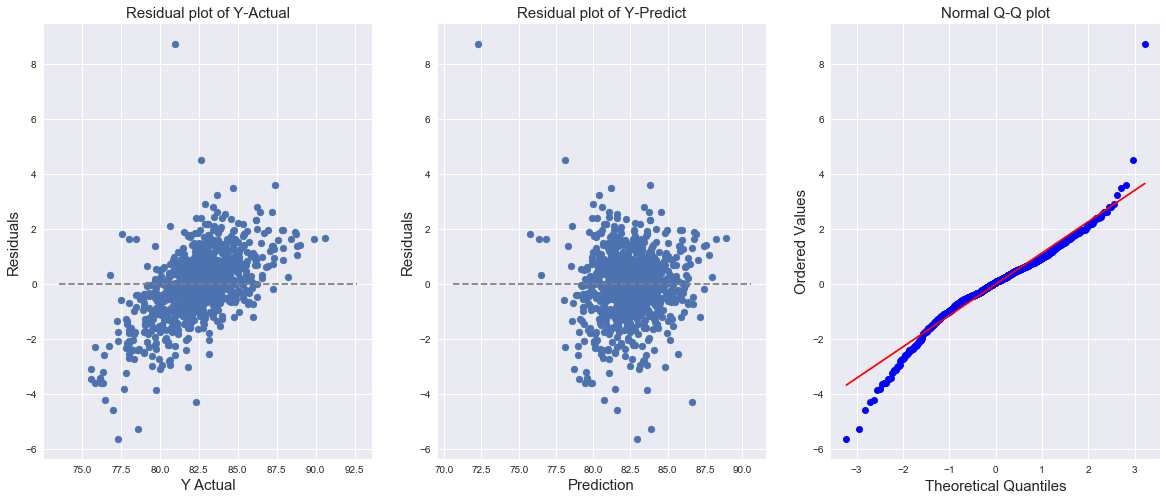

In [412]:
pred3 = model3.predict(ssX3.transform(X_train[features2]))
print(calc_Rsq(y_train, pred3))
print("Model 3 CV Mean Squared Error: ", -model3.best_score_)
diagnostic_plot(y_train, pred3)

### Model 4 Transform into Polynomials and Logs, then Use GridSearch to find the best alpha
**Cubic Transformation indicates overfitting**  
best_params:  {'alpha': 0.02}  
best_score:  2.00125756418  
Final Selected Features: 63 Dropped: 212  

**Back to Quadratic Transformation (much better) **   
best_params:  {'alpha': 0.02}  
best_score:  1.51543467208  
Final Selected Features: 31 Dropped: 79  


In [413]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

In [414]:
def preprocess(X, degree=3, ssX=None):
    """Should only be applied to scaled data"""
    X_to_raise = X.iloc[:, :9].values
    poly = PolynomialFeatures(degree)
    if (ssX is None):
        ssX = StandardScaler()
        ssX.fit(X_to_raise)
    X_scaled = ssX.transform(X_to_raise)
    X_scaled2 = poly.fit_transform(X_scaled)
    X_scaled_w_dummy = np.concatenate([X_scaled2, X.values[:, 9:]], axis=1)
    
    names=list(poly.get_feature_names())
    names=[name.replace('x0', 'Altitude_log')\
        .replace('x1', 'Sweetness_log')\
        .replace('x2', 'Quakers_log')\
        .replace('x3', 'Defects_cat1_log')\
        .replace('x4', 'Defects_cat2_log')\
        .replace('x5', 'Grading_year')\
        .replace('x6', 'Acidity')\
        .replace('x7', 'Moisture')\
        .replace('x8', 'total_weight')
        for name in names
        ]

    X_scaled_w_dummy = pd.DataFrame(X_scaled_w_dummy, 
                                    columns=[names + list(X.columns[9:])])
    return X_scaled_w_dummy, ssX

In [415]:
def Lasso_Feat_Select2(X_train, y_train, degree=3):
    X_train_norm, ssX = preprocess(X_train, degree, None)

    reg = Lasso()
    grid = GridSearchCV(reg, cv=10, param_grid={'alpha': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1.0]}, 
                        scoring='neg_mean_squared_error')
    grid.fit(X_train_norm, y_train)
    print("best_params: ", grid.best_params_)
    print("best_score: ", -grid.best_score_)
    coefs=list(zip(X_train_norm.columns, grid.best_estimator_.coef_))
    selected=[x for x in coefs if abs(x[1])>=0.01]
    print("Final Selected Features:", len(selected), 
          "Dropped:", X_train_norm.shape[1]-len(selected))
    return grid, selected, ssX

In [416]:
model4_cub, selected_features4_cub, ssX4_cub = Lasso_Feat_Select2(X_train[features2], y_train, degree=3)

best_params:  {'alpha': 0.02}
best_score:  2.00125756418
Final Selected Features: 63 Dropped: 212


In [417]:
model4_2, selected_features4_2, ssX4_2 = Lasso_Feat_Select2(X_train[features2], y_train, degree=2)

best_params:  {'alpha': 0.02}
best_score:  1.51543467208
Final Selected Features: 31 Dropped: 79


In [452]:
print(len(selected_features4_2))
selected_features4_2_sorted=sorted(selected_features4_2, key=itemgetter(1), reverse=True)
selected_features4_2_sorted[:10], selected_features4_2_sorted[-10:], 

31


([('Acidity', 1.5414083142449599),
  ('Sweetness_log', 0.81391966565962015),
  ('Country_Colombia', 0.21173820568487542),
  ('Acidity^2', 0.10027526227823973),
  ('Variety_gr_Caturra', 0.09563588780945266),
  ('Acidity Moisture', 0.093900663972649651),
  ('Defects_cat1_log Moisture', 0.041679439054759189),
  ('Sweetness_log^2', 0.039892448199429879),
  ('Sweetness_log Grading_year', 0.035408293592167989),
  ('Defects_cat2_log Acidity', 0.031858597018174416)],
 [('Moisture', -0.031955011892258627),
  ('Altitude_log Sweetness_log', -0.035221452731856021),
  ('Quakers_log Acidity', -0.041489708560108224),
  ('Color_Green', -0.051140907908210298),
  ('Altitude_log Grading_year', -0.056125836823784025),
  ('Defects_cat2_log', -0.088947513203899126),
  ('Variety_gr_Typica', -0.11847372035461604),
  ('Processing_meth_Washed_Wet', -0.20959986501444292),
  ('Country_Mexico', -0.30224462166236782),
  ('Country_Guatemala', -0.4458900930315316)])

{'r_squared: ': 0.70343562520976788, 'adjusted_r_squared: ': 0.68442508836424021, 'mean_root_error: ': 1.1296704096406769}


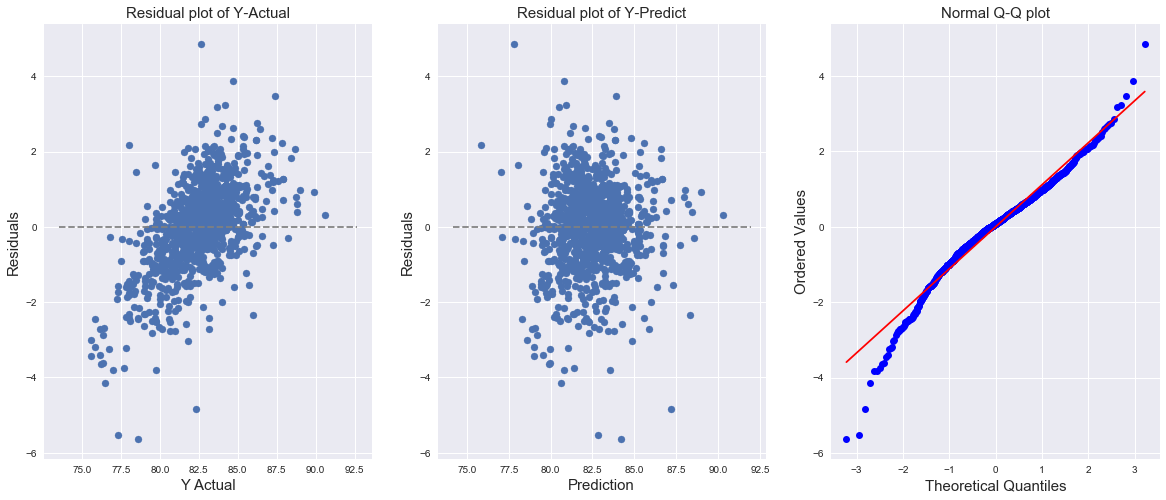

In [419]:
X_train_transformed, ssX4_2 = preprocess(X_train[features2], degree=2, ssX = ssX4_2)
X_train_transformed.shape
pred4_2 = model4_2.predict(X_train_transformed)
print(calc_Rsq(y_train, pred4_2))
diagnostic_plot(y_train, pred4_2)

### Model 5 Try Ridge Regression for Feature Selection
Cubic:  
best_params:  {'alpha': 1.0}  
best_score:  51.9488398889  
Final Selected Features: 250 Dropped: 25  

Quadratic:
best_params:  {'alpha': 1.0}  
best_score:  5.73428442164  
Final Selected Features: 102 Dropped: 8  

In [429]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [432]:
def Ridge_Feat_Select(X_train, y_train, degree=3):
    X_train_norm, ssX = preprocess(X_train, degree, None)

    reg = Ridge()
    grid = GridSearchCV(reg, cv=10, param_grid={'alpha': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1.0]}, 
                        scoring='neg_mean_squared_error')
    grid.fit(X_train_norm, y_train)
    print("best_params: ", grid.best_params_)
    print("best_score: ", -grid.best_score_)
    coefs=list(zip(X_train_norm.columns, grid.best_estimator_.coef_))
    selected=[x for x in coefs if abs(x[1])>=0.01]
    print("Final Selected Features:", len(selected), 
          "Dropped:", X_train_norm.shape[1]-len(selected))
    return grid, selected, ssX

In [433]:
model5_cub, selected_features5_cub, ssX5_cub = Ridge_Feat_Select(X_train[features2], y_train, degree=3)

best_params:  {'alpha': 1.0}
best_score:  51.9488398889
Final Selected Features: 250 Dropped: 25


In [434]:
model5_2, selected_features5_2, ssX5_2 = Ridge_Feat_Select(X_train[features2], y_train, degree=2)

best_params:  {'alpha': 1.0}
best_score:  5.73428442164
Final Selected Features: 102 Dropped: 8


{'r_squared: ': 0.72757066277480709, 'adjusted_r_squared: ': 0.71010724372191003, 'mean_root_error: ': 1.0827275815599473}


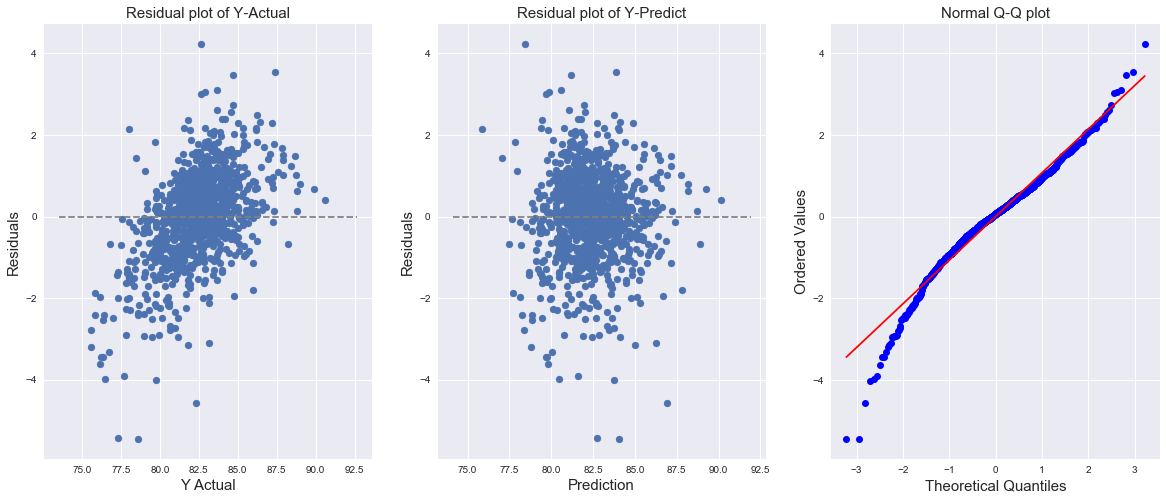

In [435]:
X_train_transformed, ssX5_2 = preprocess(X_train[features2], degree=2, ssX = ssX5_2)
X_train_transformed.shape
pred5_2 = model5_2.predict(X_train_transformed)
print(calc_Rsq(y_train, pred5_2))
diagnostic_plot(y_train, pred5_2)

In [451]:
selected_features5_2_sorted=sorted(selected_features5_2, key=itemgetter(1), reverse=True)
selected_features5_2_sorted[:10], selected_features5_2_sorted[-10:], 

([('Acidity', 1.5131636713868279),
  ('Sweetness_log', 1.0052121008118369),
  ('Country_El_Salvador', 0.61401143649574308),
  ('Sweetness_log total_weight', 0.54531102633267758),
  ('Country_Ethiopia', 0.4309904727074988),
  ('Country_Zambia', 0.37712419734595115),
  ('Variety_gr_Catimor', 0.3727006200448173),
  ('Country_Uganda', 0.36157509674349814),
  ('Processing_meth_Natural_Dry', 0.35928508331576575),
  ('Country_Costa_Rica', 0.3543964798196142)],
 [('Variety_gr_SL28', -0.33258902102929444),
  ('Country_Cote_d?Ivoire', -0.38646860040757181),
  ('Country_Mexico', -0.44805720707526242),
  ('Country_Thailand', -0.48266852845357439),
  ('Country_Guatemala', -0.48339575680440344),
  ('Country_Burundi', -0.53859235536813144),
  ('Country_Myanmar', -0.61452470637748391),
  ('Country_India', -0.67116307505061323),
  ('Country_Papua_New_Guinea', -0.70361941556307972),
  ('Country_United_States_Puerto_Rico', -0.73612781885546474)])

### Final Model

In [467]:
lasso_on_selected = Lasso(alpha=0.02)
X_train_transformed, ssX4_2 = preprocess(X_train[features2], degree=2, ssX = ssX4_2)

final_fit = lasso_on_selected.fit(X_train_transformed[[name for name, value in selected_features4_2]], y_train)
final_score = lasso_on_selected.score(X_train_transformed[[name for name, value in selected_features4_2]], y_train)
coefs = list(zip(X_train_transformed.columns, lasso_on_selected.coef_))
intercept = lasso_on_selected.intercept_

print("Final Score: ", final_score)
print("Final #  of Selected Features:", len(coefs), 
      "Dropped:", X_train_transformed.shape[1]-len(coefs))
print("Intercept: ", intercept)
coefs

Final Score:  0.702990000738
Final #  of Selected Features: 31 Dropped: 79
Intercept:  82.6138962169


[('1', 0.81450477026202883),
 ('Altitude_log', -0.099332364642362933),
 ('Sweetness_log', 1.5430261657740891),
 ('Quakers_log', -0.033594676793837937),
 ('Defects_cat1_log', -0.027637943507240203),
 ('Defects_cat2_log', -0.035291563689457198),
 ('Grading_year', 0.026853429881438375),
 ('Acidity', -0.053855081179985304),
 ('Moisture', 0.028574514623973358),
 ('total_weight', 0.039712268025631513),
 ('Altitude_log^2', -0.024659169878772511),
 ('Altitude_log Sweetness_log', 0.022832060975697389),
 ('Altitude_log Quakers_log', 0.037908123976467284),
 ('Altitude_log Defects_cat1_log', -0.030887447044438583),
 ('Altitude_log Defects_cat2_log', -0.016278720854819809),
 ('Altitude_log Grading_year', -0.035861606279430011),
 ('Altitude_log Acidity', 0.031981889753186749),
 ('Altitude_log Moisture', 0.038764051805731829),
 ('Altitude_log total_weight', 0.034568388265468084),
 ('Sweetness_log^2', -0.021696548747251507),
 ('Sweetness_log Quakers_log', 0.016530623753359591),
 ('Sweetness_log Defect

** OLS **

In [ ]:
X_train_transformed, ssX4_2 = preprocess(X_train[features2], degree=2, ssX = ssX4_2)

In [493]:
X_f = X_train_transformed[[name for name, value in selected_features4_2]]
X_f.head()

,Sweetness_log,Defects_cat2_log,Acidity,Moisture,Altitude_log^2,Altitude_log Sweetness_log,Altitude_log Defects_cat2_log,Altitude_log Grading_year,Altitude_log Acidity,Sweetness_log^2,...,Grading_year Moisture,Acidity^2,Acidity Moisture,Color_Green,Processing_meth_Washed_Wet,Variety_gr_Caturra,Variety_gr_Typica,Country_Colombia,Country_Guatemala,Country_Mexico
0,0.187625,-0.945495,-1.557357,0.426791,0.117440,0.064298,-0.324016,0.487677,-0.533698,0.035203,...,0.607352,2.425360,-0.664666,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.187625,-0.945495,-0.740514,0.212900,0.270630,0.097606,-0.491866,-0.725380,-0.385231,0.035203,...,-0.296862,0.548361,-0.157656,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.187625,-0.945495,-0.446450,0.212900,0.318366,0.105865,-0.533486,0.008096,-0.251905,0.035203,...,0.003055,0.199318,-0.095049,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.187625,1.049148,-0.446450,0.640682,0.131625,0.068071,0.380633,0.175567,-0.161973,0.035203,...,0.310039,0.199318,-0.286032,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.187625,0.846182,-0.446450,-1.926006,5.004363,-0.419725,-1.892945,-3.183461,0.998728,0.035203,...,-2.740833,0.199318,0.859866,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [494]:
model_f = sm.OLS(list(y_train), X_f)
fit_f = model_f.fit()
fit_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     260.8
Date:                Tue, 17 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:43:19   Log-Likelihood:                -5129.6
No. Observations:                1080   AIC:                         1.032e+04
Df Residuals:                    1049   BIC:                         1.048e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Sweetness_log                         8.2837      2.081      3.980      0.000       4.200      12.368
Defects_cat2_log                     -4.7141      0.954     -4.939      0.000      -6.587      -2.841
Acidity                               2.2996      0.933      2.466      0.014       0.470       4.129
Moisture                             -1.7748      0.970     -1.830      0.068      -3.678       0.128
Altitude_log^2                        6.7245      0.512     13.145      0.000       5.721       7.728
Altitude_log Sweetness_log           -0.0131      0.893     -0.015      0.988      -1.765       1.739
Altitude_log Defects_cat2_log         0.9998      0.906      1.104      0.270      -0.777       2.777
Altitude_log Grading_year             0.7168      0.881      0.813      0.416      -1.012       2.446
Altitude_log Acidity                  2.0414      0.842      2.424      0.016       0.389       3.694
Sweetness_log^2                       1.0979      0.247      4.447      0.000       0.613       1.582
Sweetness_log Quakers_log            -0.2067      0.661     -0.313      0.755      -1.504       1.091
Sweetness_log Defects_cat2_log        1.5460      0.714      2.164      0.031       0.144       2.948
Sweetness_log Grading_year            1.0507      1.463      0.718      0.473      -1.821       3.922
Quakers_log Acidity                   3.8655      0.838      4.615      0.000       2.222       5.509
Quakers_log Moisture                  3.1004      0.924      3.354      0.001       1.287       4.914
Defects_cat1_log Defects_cat2_log     1.1302      0.515      2.194      0.028       0.119       2.141
Defects_cat1_log Acidity              0.7031      1.144      0.615      0.539      -1.542       2.948
Defects_cat1_log Moisture             0.1685      1.163      0.145      0.885      -2.114       2.451
Defects_cat2_log Acidity              1.9633      1.037      1.893      0.059      -0.072       3.999
Defects_cat2_log Moisture             0.8239      0.973      0.847      0.397      -1.085       2.732
Grading_year^2                       12.7890      0.797     16.048      0.000      11.225      14.353
Grading_year Moisture                 0.0254      0.929      0.027      0.978      -1.798       1.849
Acidity^2                             4.4327      0.493      8.993      0.000       3.466       5.400
Acidity Moisture                     -1.5708      0.877     -1.792      0.073      -3.291       0.150
Color_Green                          35.2489      1.691     20.843      0.000      31.930      38.567
Processing_meth_Washed_Wet           27.9842      1.857     15.070      0.000      24.340      31.628
Variety_gr_Caturra                    6.9923      2.591      2.699      0.007       1.909      12.076
Variety_gr_Typica      

In [497]:
print(len(y_train))
print(X_f.shape)
X_f.head()

1080
(1080, 31)


,Sweetness_log,Defects_cat2_log,Acidity,Moisture,Altitude_log^2,Altitude_log Sweetness_log,Altitude_log Defects_cat2_log,Altitude_log Grading_year,Altitude_log Acidity,Sweetness_log^2,...,Grading_year Moisture,Acidity^2,Acidity Moisture,Color_Green,Processing_meth_Washed_Wet,Variety_gr_Caturra,Variety_gr_Typica,Country_Colombia,Country_Guatemala,Country_Mexico
0,0.187625,-0.945495,-1.557357,0.426791,0.117440,0.064298,-0.324016,0.487677,-0.533698,0.035203,...,0.607352,2.425360,-0.664666,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.187625,-0.945495,-0.740514,0.212900,0.270630,0.097606,-0.491866,-0.725380,-0.385231,0.035203,...,-0.296862,0.548361,-0.157656,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.187625,-0.945495,-0.446450,0.212900,0.318366,0.105865,-0.533486,0.008096,-0.251905,0.035203,...,0.003055,0.199318,-0.095049,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.187625,1.049148,-0.446450,0.640682,0.131625,0.068071,0.380633,0.175567,-0.161973,0.035203,...,0.310039,0.199318,-0.286032,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.187625,0.846182,-0.446450,-1.926006,5.004363,-0.419725,-1.892945,-3.183461,0.998728,0.035203,...,-2.740833,0.199318,0.859866,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [501]:
y_train=pd.DataFrame(y_train)
y_train

,Total_Score
664,80.25
1143,83.75
101,83.17
1226,79.50
22,83.08
812,83.17
430,83.92
236,87.25
668,85.83
1211,82.50


Final Model CV Mean Squared Error:  1.46483039199


ValueError: x and y must be the same size

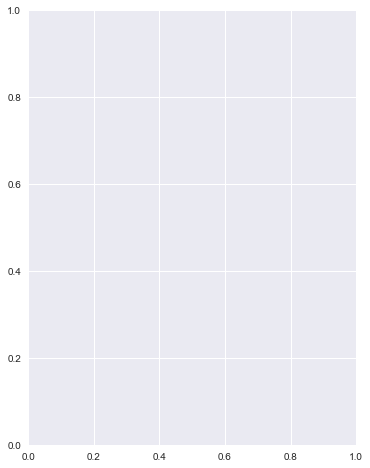

In [519]:
pred_f = fit_f.predict(X_f)

reg = LinearRegression()
scores = cross_val_score(reg, X_f, y_train, cv=10, scoring='neg_mean_squared_error')
print("Final Model CV Mean Squared Error: ", np.mean(-scores))
pred_f2 = np.array(pred_f)
y_train2 = np.array(y_train)
# print(calc_Rsq(y_train2, pred_f2))
diagnostic_plot(y_train2, pred_f2)

### Test My Final Model. Transform the X_test the same exact ways as X_train (including scaler) in order to predict y_test

In [438]:
X_test['Altitude_log'] = [log_var(x) for x in X_test['Altitude']]
X_test['Sweetness_log'] = [log_var(x) for x in X_test['Sweetness']]
X_test['Defects_cat1_log'] = [log_var(x) for x in X_test['Defects_cat1']]
X_test['Defects_cat2_log'] = [log_var(x) for x in X_test['Defects_cat2']]
X_test['Quakers_log'] = [log_var(x) for x in X_test['Quakers']]

{'r_squared: ': 0.64356418204308641, 'adjusted_r_squared: ': 0.52999394592936389, 'mean_root_error: ': 1.2561280085456337}


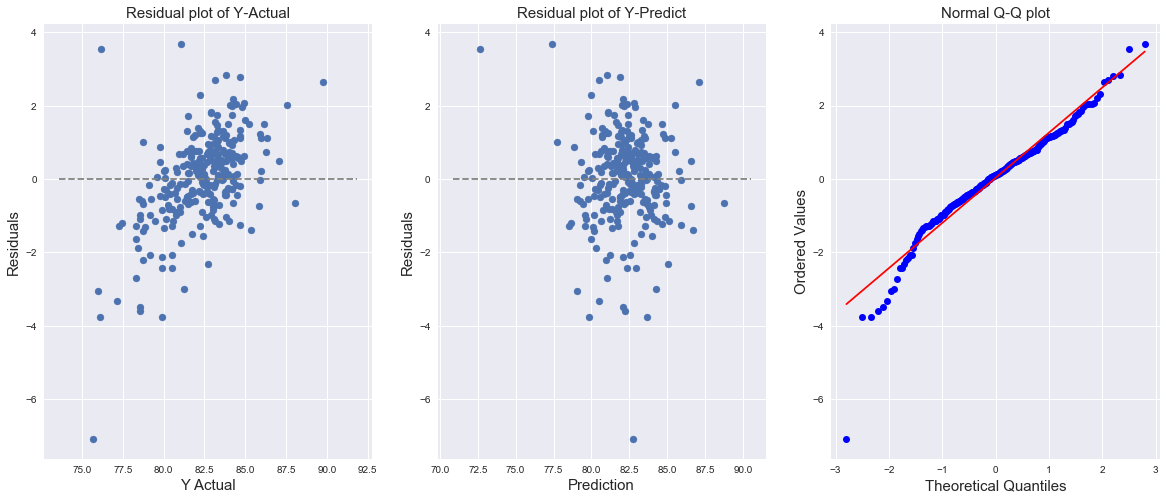

In [439]:
X_test_transformed, ssX5_2 = preprocess(X_test[features2], degree=2, ssX = ssX5_2)
X_test_transformed.shape
pred_test = model5_2.predict(X_test_transformed)
print(calc_Rsq(y_test, pred_test))
diagnostic_plot(y_test, pred_test)

{'r_squared: ': 0.65941341604797188, 'adjusted_r_squared: ': 0.55089318096521778, 'mean_root_error: ': 1.2278830322182102}


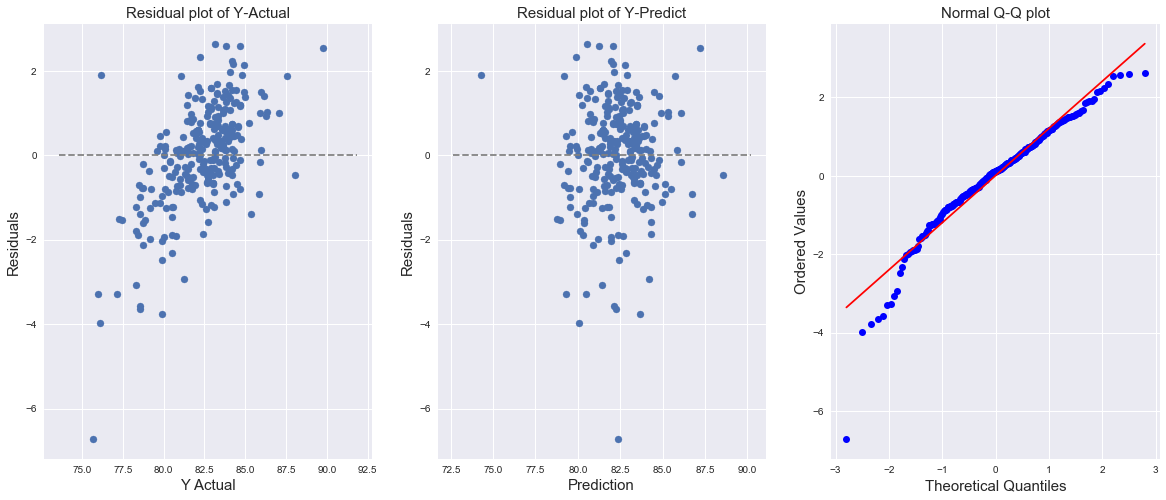

In [440]:
X_test_transformed, ssX4_2 = preprocess(X_test[features2], degree=2, ssX = ssX4_2)
X_test_transformed.shape
pred_test = model4_2.predict(X_test_transformed)
print(calc_Rsq(y_test, pred_test))
diagnostic_plot(y_test, pred_test)

In [267]:
def Lasso_Feat_Select_not_used(X_train, y_train):
    pipeline = Pipeline([
        ('scaler', preprocessing.StandardScaler()), 
        ('poly', PolynomialFeatures()),
        ('lasso', Lasso()) #assumes intercept
    ])
    
    param_grid = {
        'poly__degree': [2, 3],
        'lasso__alpha': [0.01,1.0], #[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10., 100]
    }
    
    #ssX = preprocessing.StandardScaler()
    #X_train_norm=ssX.fit_transform(X_train)

    #reg = Lasso()
    grid = GridSearchCV(pipeline, cv=10, param_grid=param_grid, 
                        scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    print("best_estimator: ", grid.best_estimator_)
    print("best_params: ", grid.best_params_)
    print("")
    print("best_score: ", -grid.best_score_)
    print("")
    return grid
    #coefs=list(zip(X_train.columns, grid.best_estimator_.coef_))
    #selected=[x for x in coefs if abs(x[1])>=0.01]
    #print("Final Selected Features:", len(selected), 
    #      "Dropped:", X_train[features2].shape[1]-len(selected))
    #return grid, selected, ssX